In [1]:
import os
import shutil
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2, ResNet101
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf

# Path ke direktori dataset train
train_dir = '/content/drive/MyDrive/datasetUAP/train'

# Memuat dataset dari direktori train
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=32,
    label_mode='int'  # Menggunakan label numerik untuk klasifikasi
)

# Mendapatkan nama-nama kelas dari dataset train
class_names = train_dataset.class_names

# Menampilkan nama-nama kelas
print(f"Class names: {class_names}")


Found 25925 files belonging to 11 classes.
Class names: ['Bacterial_spot', 'Early_blight', 'Late_blight', 'Leaf_Mold', 'Septoria_leaf_spot', 'Spider_mites Two-spotted_spider_mite', 'Target_Spot', 'Tomato_Yellow_Leaf_Curl_Virus', 'Tomato_mosaic_virus', 'healthy', 'powdery_mildew']


In [4]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/drive/MyDrive/datasetUAP/train_resize'
output_dir = '/content/drive/MyDrive/datasetUAP/train_augmented'

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

def augment_images(input_path, output_path, target_per_class=1350):
    os.makedirs(output_path, exist_ok=True)

    for class_name in os.listdir(input_path):
        class_input_dir = os.path.join(input_path, class_name)
        class_output_dir = os.path.join(output_path, class_name)
        os.makedirs(class_output_dir, exist_ok=True)

        if not os.path.isdir(class_input_dir):
            continue

        # Mengecek jumlah citra di direktori output
        existing_images = len([
            file for file in os.listdir(class_output_dir)
            if file.endswith(('.jpg', '.png', '.jpeg', '.JPG'))
        ])

        # Skip augmentasi jika jumlah citra sudah mencukupi
        if existing_images >= target_per_class:
            print(f"Augmentasi diskip untuk kelas '{class_name}' (Jumlah citra: {existing_images})")
            continue

        print(f"Memproses kelas: {class_name}")
        image_count = existing_images
        for img_name in os.listdir(class_input_dir):
            img_path = os.path.join(class_input_dir, img_name)
            if img_path.endswith(('.jpg', '.png', '.jpeg', '.JPG')):
                img = tf.keras.utils.load_img(img_path)
                img_array = tf.keras.utils.img_to_array(img)
                img_array = img_array.reshape((1,) + img_array.shape)

                prefix = os.path.splitext(img_name)[0]
                i = 0
                for batch in datagen.flow(img_array, batch_size=1,
                                          save_to_dir=class_output_dir,
                                          save_prefix=prefix, save_format='jpg'):
                    i += 1
                    image_count += 1
                    if image_count >= target_per_class:
                        break
                if image_count >= target_per_class:
                    break
        print(f"Jumlah citra augmentasi di kelas '{class_name}': {image_count}")


augment_images(base_dir, output_dir, target_per_class=1350)

print("\nProses augmentasi selesai.")


Memproses kelas: Late_blight
Jumlah citra augmentasi di kelas 'Late_blight': 1350
Memproses kelas: Septoria_leaf_spot
Jumlah citra augmentasi di kelas 'Septoria_leaf_spot': 1350
Memproses kelas: Tomato_Yellow_Leaf_Curl_Virus
Jumlah citra augmentasi di kelas 'Tomato_Yellow_Leaf_Curl_Virus': 1350
Memproses kelas: powdery_mildew
Jumlah citra augmentasi di kelas 'powdery_mildew': 1350
Memproses kelas: Tomato_mosaic_virus
Jumlah citra augmentasi di kelas 'Tomato_mosaic_virus': 1350
Memproses kelas: Spider_mites Two-spotted_spider_mite
Jumlah citra augmentasi di kelas 'Spider_mites Two-spotted_spider_mite': 1350
Memproses kelas: Leaf_Mold
Jumlah citra augmentasi di kelas 'Leaf_Mold': 1350
Memproses kelas: healthy
Jumlah citra augmentasi di kelas 'healthy': 1350
Memproses kelas: Target_Spot
Jumlah citra augmentasi di kelas 'Target_Spot': 1350
Memproses kelas: Bacterial_spot
Jumlah citra augmentasi di kelas 'Bacterial_spot': 1350
Memproses kelas: Early_blight
Jumlah citra augmentasi di kelas '

In [5]:
augmented_dir = '/content/drive/MyDrive/datasetUAP/train_augmented'

# Hitung jumlah gambar dalam setiap kelas
data_distribution = {}
for class_name in class_names:
    class_dir = os.path.join(augmented_dir, class_name)
    total_images = len([f for f in os.listdir(class_dir) if f.endswith(('.jpg', '.png', '.jpeg', '.JPG'))])
    data_distribution[class_name] = total_images

# Tampilkan hasil
for class_name, count in data_distribution.items():
    print(f"{class_name}: {count} images")

def count_total_images(directory):
    total_images = 0
    for root, dirs, files in os.walk(directory):
        total_images += len(files)  # Jumlah file di setiap subfolder
    return total_images

total_images = count_total_images(augmented_dir)
print(f"\nTotal jumlah citra di dataset setelah augmentasi: {total_images}")

Bacterial_spot: 1339 images
Early_blight: 1342 images
Late_blight: 1337 images
Leaf_Mold: 1339 images
Septoria_leaf_spot: 1334 images
Spider_mites Two-spotted_spider_mite: 1340 images
Target_Spot: 1342 images
Tomato_Yellow_Leaf_Curl_Virus: 1345 images
Tomato_mosaic_virus: 1343 images
healthy: 1344 images
powdery_mildew: 1333 images

Total jumlah citra di dataset setelah augmentasi: 14738


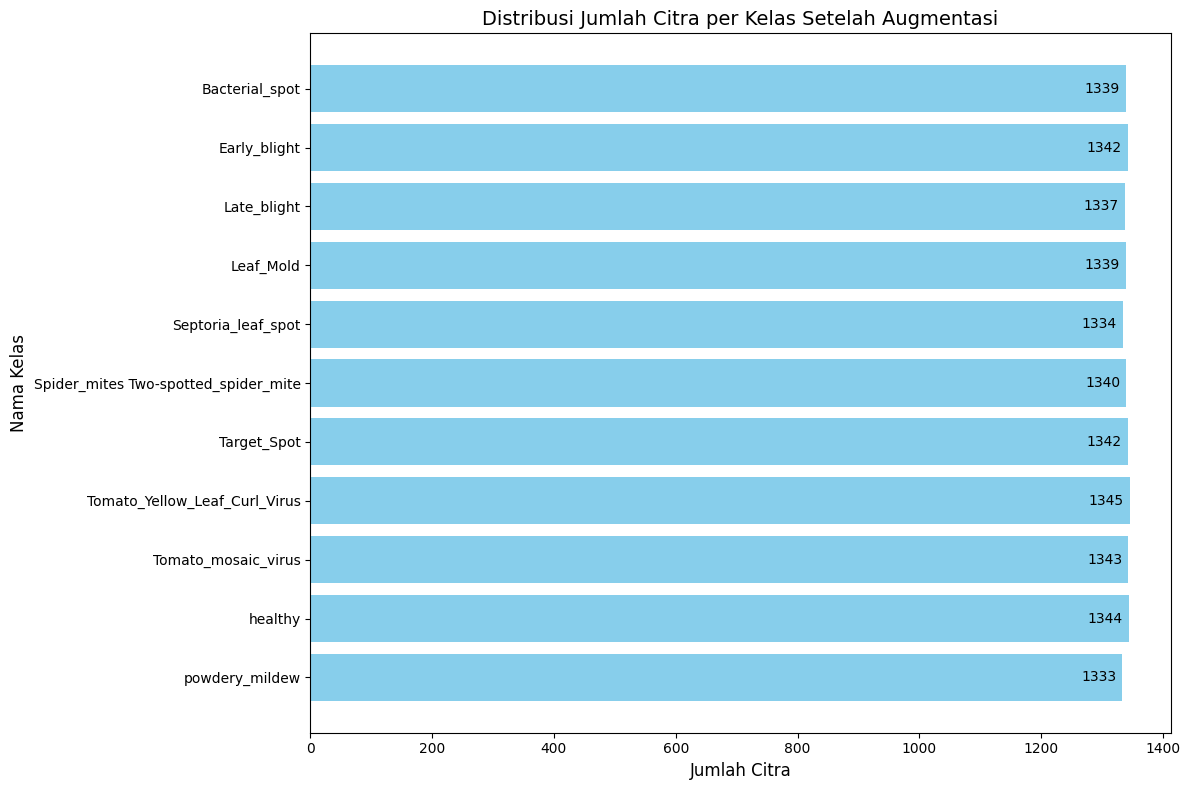

In [6]:
fig, ax = plt.subplots(figsize=(12, 8))
class_names_list = list(data_distribution.keys())
image_counts = list(data_distribution.values())

bars = ax.barh(class_names_list, image_counts, color='skyblue')

for bar in bars:
    ax.text(bar.get_width() - 10, bar.get_y() + bar.get_height()/2,
            str(int(bar.get_width())), va='center', ha='right', fontsize=10, color='black')

ax.set_title("Distribusi Jumlah Citra per Kelas Setelah Augmentasi", fontsize=14)
ax.set_xlabel("Jumlah Citra", fontsize=12)
ax.set_ylabel("Nama Kelas", fontsize=12)
ax.invert_yaxis()

plt.tight_layout()
plt.show()

In [7]:
split_dir = '/content/drive/MyDrive/datasetUAP/train_split1'

# Buat direktori baru untuk split dataset
train_dir = os.path.join(split_dir, 'train')
val_dir = os.path.join(split_dir, 'validation')
test_dir = os.path.join(split_dir, 'test')

for folder in [train_dir, val_dir, test_dir]:
    if not os.path.exists(folder):
        os.makedirs(folder)

# Proporsi split
train_split = 0.8
val_split = 0.1
test_split = 0.1


for class_name in class_names:
    class_path = os.path.join(augmented_dir, class_name)
    images = [f for f in os.listdir(class_path) if f.endswith(('.jpg', '.jpeg', '.png', '.JPEG'))]
    random.shuffle(images)  # Acak urutan gambar

    train_count = int(len(images) * train_split)
    val_count = int(len(images) * val_split)

    # Alokasikan gambar ke train, validation, dan test
    train_images = images[:train_count]
    val_images = images[train_count:train_count + val_count]
    test_images = images[train_count + val_count:]

    # Buat subfolder per kelas
    for subfolder, img_list in zip(['train', 'validation', 'test'],
                                   [train_images, val_images, test_images]):
        target_dir = os.path.join(split_dir, subfolder, class_name)
        os.makedirs(target_dir, exist_ok=True)

        for img_name in img_list:
            src = os.path.join(class_path, img_name)
            dst = os.path.join(target_dir, img_name)
            shutil.copy2(src, dst)

print("Split data selesai.")


Split data selesai.


In [8]:
train_dir = '/content/drive/MyDrive/datasetUAP/train_split1/train'
val_dir = '/content/drive/MyDrive/datasetUAP/train_split1/validation'
test_dir = '/content/drive/MyDrive/datasetUAP/train_split1/test'

In [9]:
import tensorflow as tf

split_dir = '/content/drive/MyDrive/dataset/train_split1'

image_size = (224, 224)
batch_size = 32

datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_data = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_data = datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

print(f"Training data: {train_data.samples} images")
print(f"Validation data: {val_data.samples} images")
print(f"Testing data: {test_data.samples} images")


Found 14050 images belonging to 11 classes.
Found 2721 images belonging to 11 classes.
Found 2756 images belonging to 11 classes.
Training data: 14050 images
Validation data: 2721 images
Testing data: 2756 images


In [10]:
base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(len(train_data.class_indices), activation='softmax')(x)

171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [11]:
model = Model(inputs=base_model.input, outputs=predictions) # This line is crucial

model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 43,185,547 (164.74 MB)

 Trainable params: 43,080,203 (164.34 MB)

 Non-trainable params: 105,344 (411.50 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
]

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    callbacks=callbacks
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


168/440 ━━━━━━━━━━━━━━━━━━━━ 3:09:55 42s/step - accuracy: 0.5675 - loss: 1.3990

In [ ]:
test_loss, test_acc = model.evaluate(test_data, verbose=2)
print(f"\nAkurasi model pada data test: {test_acc:.2f}")

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_pred = model.predict(test_data, verbose=2)
test_pred_class = np.argmax(test_pred, axis=1)
test_true_class = test_data.classes
cm = confusion_matrix(test_true_class, test_pred_class)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_data.class_indices.keys(),
            yticklabels=test_data.class_indices.keys(), cbar=False, annot_kws={'size': 16})
plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predicted Label', fontsize=16)
plt.ylabel('True Label', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
model.save("UAP_ResNet.keras")